In [113]:
import pandas as pd
import os
import matplotlib.pyplot as plot

In [ ]:
# LA Counties
fips = ['06037','06059']

In [4]:
def filter_fips(df, fips=fips):
    return df[df['cbg'].astype(str).str[:5].isin(fips)]

In [74]:
path = '/Users/anchitsrivastava/Projects/myst/data/processed/la/social_distancing/2020/'

all_files = os.listdir(path)

li = []

for i in range(len(all_files)):
    try :
        df = filter_fips(pd.read_csv(path+all_files[i], dtype={'cbg': object },index_col=None, header=0,engine='python'))
        li.append(df)
    except Exception as e:
        pass
    if i > 100 :
        break

    
df = pd.concat(li, axis=0, ignore_index=True)

#print("lo length = {}".format(len(li)))

In [75]:
'The total number of rows in the social distancing data for 2020 are {}'.format(df.shape[0])

'The total number of rows in the social distancing data for 2020 are 830577'

In [76]:
df['date_range_start']= pd.to_datetime(df['date_range_start'])

In [77]:
# Select only the columsn that we need for the analysis
devices_mobility = df[['date_range_start','cbg','device_count','completely_home_device_count','part_time_work_behavior_devices','full_time_work_behavior_devices']]

In [78]:
#Rename columns
devices_mobility = devices_mobility.rename(columns={'date_range_start':'date','device_count':'total', 'completely_home_device_count':'completely_home','part_time_work_behavior_devices':'part_time_work', 'full_time_work_behavior_devices':'full_time_work'})

In [79]:
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work
0,2020-11-11 00:00:00-08:00,060371012201,46,6,3,1
1,2020-11-11 00:00:00-08:00,060371066452,85,35,7,2
2,2020-11-11 00:00:00-08:00,060371210102,51,17,4,2
3,2020-11-11 00:00:00-08:00,060371342012,50,12,6,4
4,2020-11-11 00:00:00-08:00,060371959011,20,5,2,1
...,...,...,...,...,...,...
830572,2020-05-28 00:00:00-07:00,060375736013,45,16,1,1
830573,2020-05-28 00:00:00-07:00,060375740003,68,24,6,3
830574,2020-05-28 00:00:00-07:00,060376511022,68,29,5,5
830575,2020-05-28 00:00:00-07:00,060590864061,21,13,1,2


In [80]:
device_columns = ['completely_home','part_time_work','full_time_work']

In [81]:
for column in device_columns :
    devices_mobility['precentage_'+column]= devices_mobility.apply(lambda row: row[column]/row['total']*100 if row['total']!=0 else 0, axis=1)


In [82]:
for column in device_columns:
        devices_mobility['norm_'+column] = (devices_mobility['precentage_'+ column] - devices_mobility['precentage_'+column].mean()) / devices_mobility['precentage_'+column].std()

In [83]:
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,precentage_completely_home,precentage_part_time_work,precentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work
0,2020-11-11 00:00:00-08:00,060371012201,46,6,3,1,13.043478,6.521739,2.173913,-1.702106,-0.168135,-0.703148
1,2020-11-11 00:00:00-08:00,060371066452,85,35,7,2,41.176471,8.235294,2.352941,0.555495,0.169473,-0.655313
2,2020-11-11 00:00:00-08:00,060371210102,51,17,4,2,33.333333,7.843137,3.921569,-0.073897,0.092210,-0.236189
3,2020-11-11 00:00:00-08:00,060371342012,50,12,6,4,24.000000,12.000000,8.000000,-0.822873,0.911204,0.853532
4,2020-11-11 00:00:00-08:00,060371959011,20,5,2,1,25.000000,10.000000,5.000000,-0.742625,0.517159,0.051958
...,...,...,...,...,...,...,...,...,...,...,...,...
830572,2020-05-28 00:00:00-07:00,060375736013,45,16,1,1,35.555556,2.222222,2.222222,0.104431,-1.015235,-0.690240
830573,2020-05-28 00:00:00-07:00,060375740003,68,24,6,3,35.294118,8.823529,4.411765,0.083451,0.285368,-0.105213
830574,2020-05-28 00:00:00-07:00,060376511022,68,29,5,5,42.647059,7.352941,7.352941,0.673506,-0.004370,0.680644
830575,2020-05-28 00:00:00-07:00,060590864061,21,13,1,2,61.904762,4.761905,9.523810,2.218888,-0.514862,1.260681


In [86]:
devices_mobility['date']= pd.to_datetime(devices_mobility['date'],utc= True)

In [89]:
devices_mobility['month'] = devices_mobility['date'].dt.month

In [90]:
devices_mobility

,date,cbg,total,completely_home,part_time_work,full_time_work,precentage_completely_home,precentage_part_time_work,precentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,year,month
0,2020-11-11 08:00:00+00:00,060371012201,46,6,3,1,13.043478,6.521739,2.173913,-1.702106,-0.168135,-0.703148,2020,11
1,2020-11-11 08:00:00+00:00,060371066452,85,35,7,2,41.176471,8.235294,2.352941,0.555495,0.169473,-0.655313,2020,11
2,2020-11-11 08:00:00+00:00,060371210102,51,17,4,2,33.333333,7.843137,3.921569,-0.073897,0.092210,-0.236189,2020,11
3,2020-11-11 08:00:00+00:00,060371342012,50,12,6,4,24.000000,12.000000,8.000000,-0.822873,0.911204,0.853532,2020,11
4,2020-11-11 08:00:00+00:00,060371959011,20,5,2,1,25.000000,10.000000,5.000000,-0.742625,0.517159,0.051958,2020,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830572,2020-05-28 07:00:00+00:00,060375736013,45,16,1,1,35.555556,2.222222,2.222222,0.104431,-1.015235,-0.690240,2020,5
830573,2020-05-28 07:00:00+00:00,060375740003,68,24,6,3,35.294118,8.823529,4.411765,0.083451,0.285368,-0.105213,2020,5
830574,2020-05-28 07:00:00+00:00,060376511022,68,29,5,5,42.647059,7.352941,7.352941,0.673506,-0.004370,0.680644,2020,5
830575,2020-05-28 07:00:00+00:00,060590864061,21,13,1,2,61.904762,4.761905,9.523810,2.218888,-0.514862,1.260681,2020,5


In [105]:
grouped_dm = devices_mobility.groupby([devices_mobility['month']]).mean()


In [107]:
grouped_dm

,total,completely_home,part_time_work,full_time_work,precentage_completely_home,precentage_part_time_work,precentage_full_time_work,norm_completely_home,norm_part_time_work,norm_full_time_work,year
month,,,,,,,,,,,
1,64.829201,15.583211,6.489103,3.390104,24.000711,10.031645,5.651652,-0.822816,0.523394,0.226074,2020.0
2,70.624661,18.357403,5.625095,2.618550,25.924538,7.921383,4.097687,-0.668434,0.107626,-0.189132,2020.0
3,63.441792,20.852943,5.033003,2.945931,33.782980,7.777333,4.954971,-0.037814,0.079245,0.039927,2020.0
4,58.368475,27.584298,2.863144,1.957165,46.748995,5.306500,3.958903,1.002676,-0.407564,-0.226214,2020.0
5,60.802621,24.885965,3.352684,1.970785,40.358451,5.729125,3.782042,0.489851,-0.324298,-0.273470,2020.0
6,62.154658,23.619224,4.278077,2.652575,36.881041,7.020562,4.684857,0.210798,-0.069856,-0.032245,2020.0
7,61.864061,23.671410,3.992626,2.474548,36.415937,6.864930,4.720908,0.173475,-0.100519,-0.022613,2020.0
8,67.602138,26.949849,4.532331,2.802462,34.349563,7.799174,5.280485,0.007653,0.083548,0.126901,2020.0
9,60.458702,20.896098,4.594551,3.089820,33.696314,8.111715,5.920285,-0.044768,0.145125,0.297850,2020.0


<AxesSubplot:title={'center':'month analysis'}, xlabel='month'>

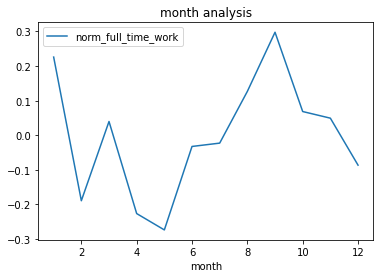

In [119]:
grouped_dm.plot.line( title="month analysis", y = "norm_full_time_work")

<AxesSubplot:title={'center':'month analysis'}, xlabel='month'>

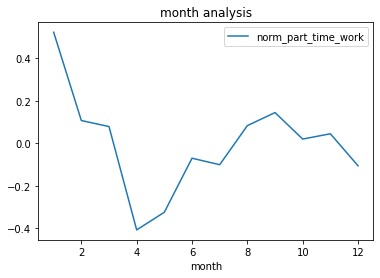

In [118]:
grouped_dm.plot.line( title="month analysis", y = "norm_part_time_work")

<AxesSubplot:title={'center':'month analysis'}, xlabel='month'>

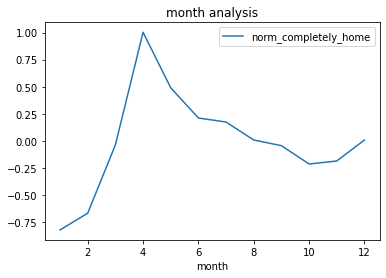

In [120]:
grouped_dm.plot.line( title="month analysis", y = "norm_completely_home")